# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

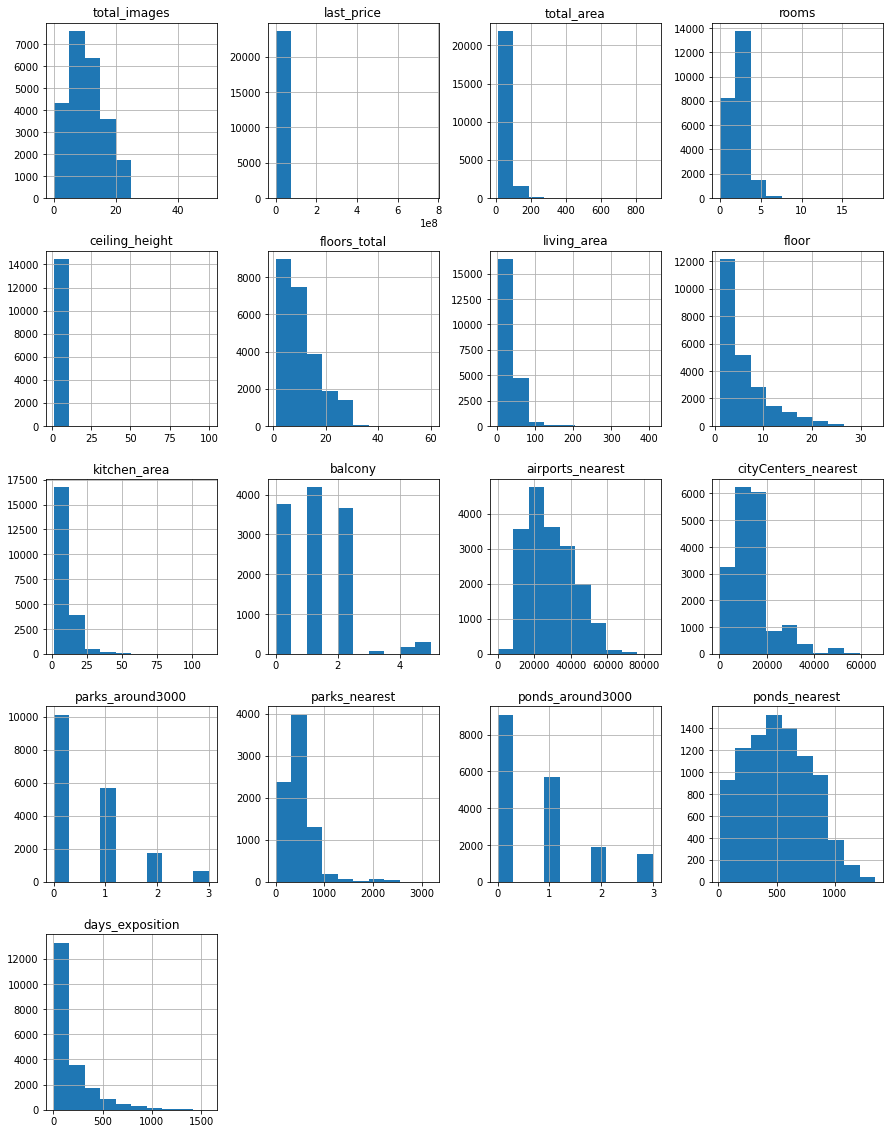

In [3]:
data.hist(figsize=(15, 20))

### Предобработка данных

In [4]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)

#Если в объявлении не сказано про апартаменты или балконы - скорее всего это не апартаменты, да и балконов там нет.
#Поэтому пропуски в этих стобцах заменены на False или 0 соотвественно.
#Высота потолков редко бывает выше или ниже медианы, поэтому пропуски в этом столбце я решил заменить на медиану.

Причины пропусков в данных - ошибки при выгрузке, человеческий фактор, лень при заполнении, несовместимость систем или просто отсуствие нужной информации у заполняющего, а так же незнание того, что эти пункты можно заполнить

In [6]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [8]:
data['balcony'] = data['balcony'].astype(int)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [9]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Везде где тип данных был изменен невозможны нецелые значения, соотвественно для удобства нужно их изменить на целочисленные столбцы, но перед эти необходимо поменять формат отсутствующих данных.

In [10]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

Во первых я везде поменял букву ё на е, смысла это не меняет, а повторений становится меньше. Названия поселков и деревень могут совпадать, поэтмоу тут я ничего менять не стал

In [11]:
data['locality_name'].isna().sum()

49

In [12]:
data = data.dropna(subset=['locality_name'])
#удалим все строки где не указаны названия населенных пунктов.

In [13]:
data['locality_name'].isna().sum()

0

In [14]:
data['locality_name'] = data['locality_name'].replace('поселок ', '')
    

In [15]:
display (len(data['locality_name'].unique()))

330

In [16]:
data['locality_name'] = [i.replace('поселок  ', '') for i in data['locality_name']]
data['locality_name'] = [i.replace(' поселок ', '') for i in data['locality_name']]
data['locality_name'] = [i.replace('городского ', '') for i in data['locality_name']]
data['locality_name'] = [i.replace('городской  ', '') for i in data['locality_name']]
data['locality_name'] = [i.replace('деревня ', '') for i in data['locality_name']]
data['locality_name'] = [i.replace('типа ', '') for i in data['locality_name']]
data['locality_name'] = [i.replace('поселок ', '') for i in data['locality_name']]
data['locality_name'] = [i.replace('садовое товарищество ', '') for i in data['locality_name']]
data['locality_name'] = [i.replace('село ', '') for i in data['locality_name']]
data['locality_name'] = [i.replace('имени', '') for i in data['locality_name']]
data['locality_name'] = [i.replace('коттеджный', '') for i in data['locality_name']]

In [17]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'городскойЯнино-1', 'Парголово',
       'Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'Кудрово', 'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина',
       'Федоровское', 'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокси

In [18]:
print(data['rooms'].unique())
print (len(data.loc[data['rooms']>=7, 'rooms']))
#90 квартир на фоне 20 000 выглядят блекло, от них можно избавиться
data = data.query('rooms < 7')
print (len(data.loc[data['rooms']>=7, 'rooms']))

[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]
90
0


<AxesSubplot:>

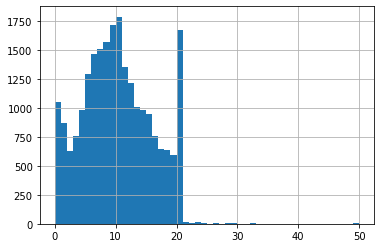

In [19]:
data['total_images'].hist(bins=50)
#кто то очень любит фотографировать, а кто то не очень

AxesSubplot(0.125,0.125;0.775x0.755)


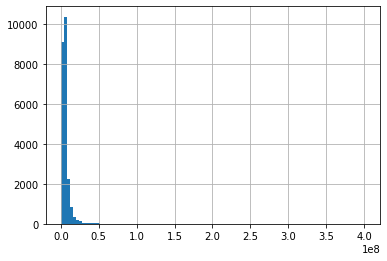

In [20]:
print (data['last_price'].hist(bins=100))

401300000.0
12190.0
662
AxesSubplot(0.125,0.125;0.775x0.755)


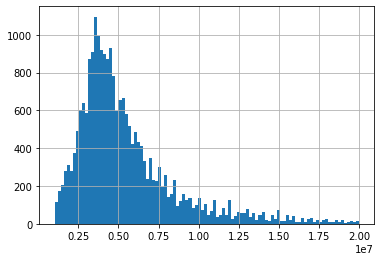

In [21]:
print (data['last_price'].max())
print (data['last_price'].min())
print (len(data.query('last_price>=20000000')))
#Квартиры вполне могут стоить больше 20 миллионов, но я предлагаю исключить их из наших данных, поскольку это нестандартные случаи, портящие данные
#Вряд ли есть квартиры дешевле миллиона, их тоже можно удалять из выборки
data = data.query('last_price<20000000')
data = data.query('last_price>1000000')
print (data['last_price'].hist(bins=100))

In [22]:
data = data.query('days_exposition<900')
#Не стоит учитывать квартиры ,время прожаи которых приближается к 3 годам.

AxesSubplot(0.125,0.125;0.775x0.755)
130
0


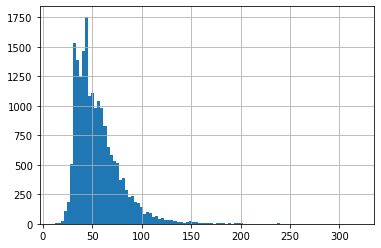

In [23]:
print (data['total_area'].hist(bins=100))
print (len(data.query('total_area>=150')))
print (len(data.query('total_area<=5')))
#квартиры могут быть очень маленькими, но метраж выше 150 я предлагаю удалять чтобы не портить данные

In [24]:
data = data.query('total_area<150')

AxesSubplot(0.125,0.125;0.775x0.755)


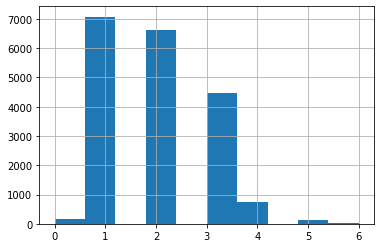

In [25]:
print (data['rooms'].hist(bins=10))
#с комнатами все в порядке

In [26]:
print (data['ceiling_height'].max())
#100 метров и в 10 смотрится не очень, нужно удалять
data=data.query('ceiling_height<80')
print (data['ceiling_height'].max())

100.0
27.5


In [27]:
data.loc[data['ceiling_height']>25, 'ceiling_height'] = data['ceiling_height'] / 10
print (data['ceiling_height'].max())
#все что выше 25 можно поделить на 10, чтобы не удалять данные, так как скорее всего это ошика, а все что между 10 и 20 можно смело удалять

25.0


In [28]:
data = data.query('ceiling_height<=10')
print (data['ceiling_height'].max())

8.3


AxesSubplot(0.125,0.125;0.775x0.755)


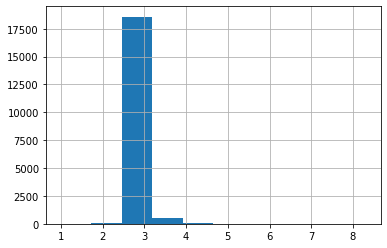

In [29]:
print (data['ceiling_height'].hist(bins=10))

AxesSubplot(0.125,0.125;0.775x0.755)
60.0
1.0


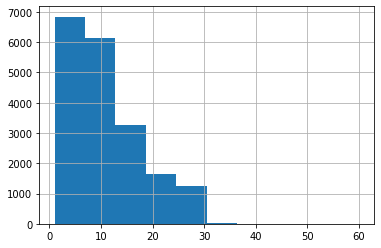

In [30]:
print (data['floors_total'].hist(bins=10))
print (data['floors_total'].max())
print (data['floors_total'].min())
#Тут я не вижу ошибок

AxesSubplot(0.125,0.125;0.775x0.755)
128.0
2.0


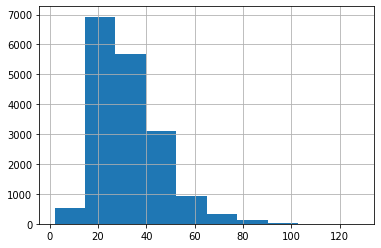

In [31]:
print (data['living_area'].hist(bins=10))
print (data['living_area'].max())
print (data['living_area'].min())
#нет ярковыраженных аномалий

В остальных графиках я не вижу критичных ошибок.

### Посчитайте и добавьте в таблицу новые столбцы

In [32]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')

In [33]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year
#добавялем нолвые трубуемые столбцы

In [34]:
def floor_number(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
#функция поможет заполнить столбец с категорией этажа

In [35]:
data['floor_category'] = data.apply(floor_number, axis = 1)
data['city_center_distance_km'] = round(data['cityCenters_nearest'] / 1000)

In [36]:
data.info()
#проверил наличие столбцов

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19218 entries, 1 to 23697
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             19218 non-null  int64         
 1   last_price               19218 non-null  float64       
 2   total_area               19218 non-null  float64       
 3   first_day_exposition     19218 non-null  datetime64[ns]
 4   rooms                    19218 non-null  int64         
 5   ceiling_height           19218 non-null  float64       
 6   floors_total             19146 non-null  float64       
 7   living_area              17669 non-null  float64       
 8   floor                    19218 non-null  int64         
 9   is_apartment             19218 non-null  bool          
 10  studio                   19218 non-null  bool          
 11  open_plan                19218 non-null  bool          
 12  kitchen_area             17296 n

### Проведите исследовательский анализ данных

count    19218.000000
mean        54.629596
std         20.960300
min         12.000000
25%         39.000000
50%         50.000000
75%         65.000000
max        149.200000
Name: total_area, dtype: float64


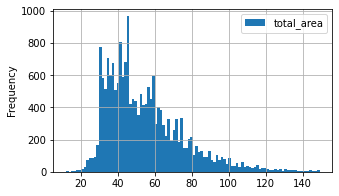

In [37]:
#изучим общую площадь
data
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3))
print (data['total_area'].describe())

Большая часть квартир находится в диапазоне от 30 до 60 метров

count    17669.000000
mean        31.171372
std         14.493081
min          2.000000
25%         18.000000
50%         29.300000
75%         40.000000
max        128.000000
Name: living_area, dtype: float64


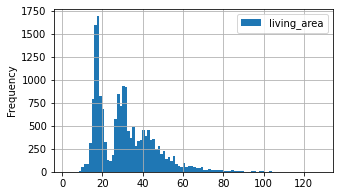

In [38]:
#изучим жилую площадь
data
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3))
print (data['living_area'].describe())

Подавляющее большиснвто жилой площади представлено чуть менее, чем 20 метрами, либо 30 метрами

count    17296.000000
mean         9.946690
std          4.324908
min          2.000000
25%          7.000000
50%          9.000000
75%         11.315000
max         64.000000
Name: kitchen_area, dtype: float64


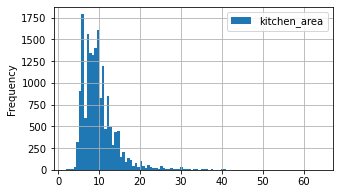

In [39]:
#изучим кухонную площадь
data
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3))
print (data['kitchen_area'].describe())

Размер кухни слабо зависит от размеров квартиры - от 5 до 10 метров, зачем нам больше?

count    1.921800e+04
mean     5.200972e+06
std      2.857615e+06
min      1.010000e+06
25%      3.400000e+06
50%      4.471000e+06
75%      6.200000e+06
max      1.999900e+07
Name: last_price, dtype: float64

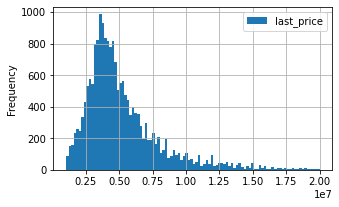

In [40]:
#изучим цену
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (5,3))
data['last_price'].describe()

У цены нормальное распределение с пиком в 3-4 млн рублей, после 5 наблюдается резкий спад

count    19218.000000
mean         1.944947
std          0.925934
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

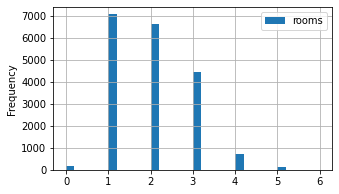

In [41]:
#изучим число комнат
data
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
data['rooms'].describe()

Однушки двушки и трешки - наше все, а студий даже меньше, чем 4-комантных квартир - их количество сопоставимо с количеством пятикомнатных

count    19218.000000
mean         2.679971
std          0.203781
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

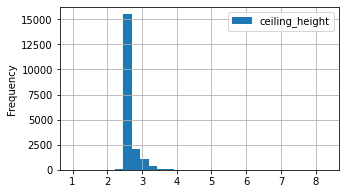

In [42]:
#изучим высоту потолков
data
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
data['ceiling_height'].describe()

Потолки практически везде одинаковые - 2,6 метра

count    19218.000000
mean         6.043865
std          4.967459
min          1.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

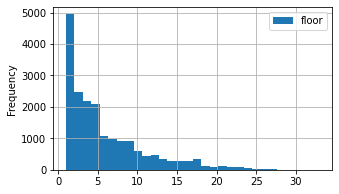

In [43]:
#изучим этажи
data
data.plot(y = 'floor', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
data['floor'].describe()

больше всего квартир в диапазоне от 1 до 5 этажа - очевидно что в спб и ленобласти доминирует низкоэтажное строительство (неудивительно)

                floor
floor_category       
другой          14289
первый           2305
последний        2555


<AxesSubplot:xlabel='floor_category'>

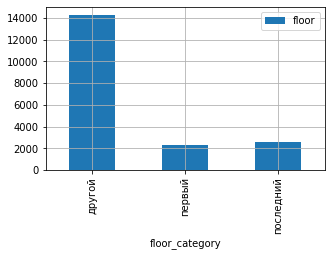

In [44]:
#изучим тип этажа
i = data.pivot_table(index='floor_category', values='floor', aggfunc='count')
print(i.head(10))
i.plot.bar(grid=True, figsize = (5,3))

Первых и посоледних этажей заметно меньше, чем непервых и непоследних

count    19146.000000
mean        11.024444
std          6.680222
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

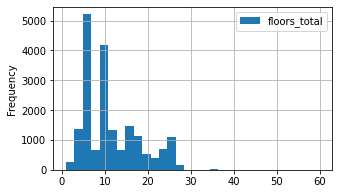

In [45]:
#изучим этажность
data
data.plot(y = 'floors_total', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
data['floors_total'].describe()

Пяти и девятиэтажки - лицо Петербурга

count    14848.000000
mean     14653.036638
std       8460.368394
min        208.000000
25%      10210.000000
50%      13369.500000
75%      16528.250000
max      64857.000000
Name: cityCenters_nearest, dtype: float64

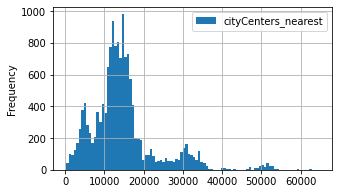

In [46]:
#изучим расстояние до центра города в метрах
data
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 100, grid=True, figsize = (5,3))
data['cityCenters_nearest'].describe()

чуть больше 10 километров до центра города доминирует - далековато, но это спальники

count    14831.000000
mean     28941.822332
std      12890.594809
min          0.000000
25%      18274.000000
50%      27084.000000
75%      37636.000000
max      83758.000000
Name: airports_nearest, dtype: float64

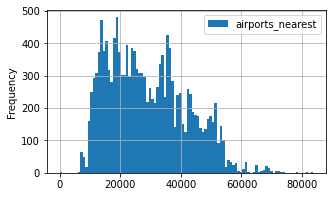

In [47]:
#изучим расстояние до ближайшего аэропорта
data
data.plot(y = 'airports_nearest', kind = 'hist', bins = 100, grid=True, figsize = (5,3))
data['airports_nearest'].describe()

расстояние редко бывает меньше 10 километров и больше 50 - я не удивлен

count    6292.000000
mean      491.648760
std       340.073799
min         1.000000
25%       288.000000
50%       455.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

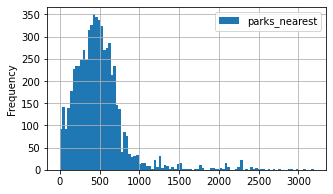

In [48]:
#изучим расстояние до ближайшего парка
data
data.plot(y = 'parks_nearest', kind = 'hist', bins = 100, grid=True, figsize = (5,3))
data['parks_nearest'].describe()

Очевидная доминация 400-500 метров до ближайшего парка - парки есть везде, поздравляем

<AxesSubplot:xlabel='first_day_exposition'>

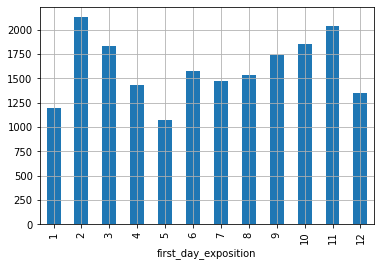

In [49]:
data.groupby(data['first_day_exposition'].dt.month).size().plot.bar(rot=90, grid=True)


В мае и январе квартиры продавать не хотят, квартиры продавать хотят под конец года (улетают зимовать на деньги с продажи?)

<AxesSubplot:xlabel='first_day_exposition'>

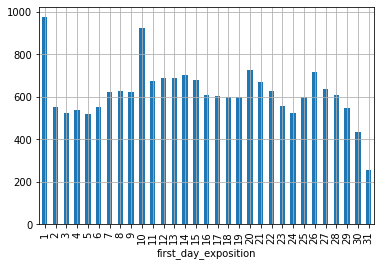

In [50]:
data.groupby(data['first_day_exposition'].dt.day).size().plot.bar(rot=90, grid=True)

Большинество объявлений (в 2 раза чаще) - выставляются 1 и 10 числа - магические даты

In [51]:
list(data)

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition',
 'price_per_square_meter',
 'weekday_exposition',
 'month_exposition',
 'year_exposition',
 'floor_category',
 'city_center_distance_km']

<AxesSubplot:ylabel='Frequency'>

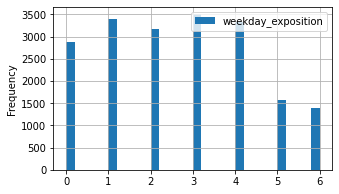

In [52]:
data.plot(y = 'weekday_exposition', kind = 'hist', grid=True, figsize = (5,3), bins=30)

В будни все выкладывают, в выходные все отдыхают, разница - в два раза

Все столбцы до этого были избавлены от аномалий и лишних данных, поэтому гистограммы получились адекватными и правдивыми. 

count    19218.000000
mean       159.333437
std        174.912580
min          1.000000
25%         43.000000
50%         90.000000
75%        212.000000
max        898.000000
Name: days_exposition, dtype: float64

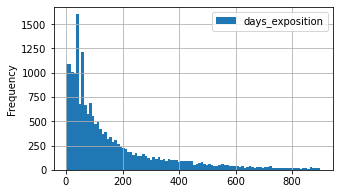

In [53]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (5,3))
data['days_exposition'].describe()

(1.0, 1000.0)

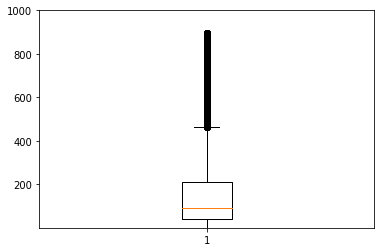

In [54]:
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)

<AxesSubplot:ylabel='Frequency'>

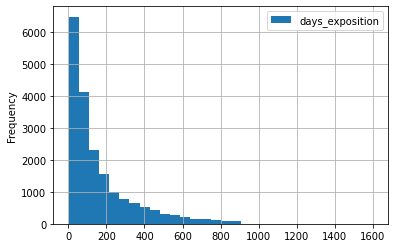

In [55]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))


<AxesSubplot:ylabel='Frequency'>

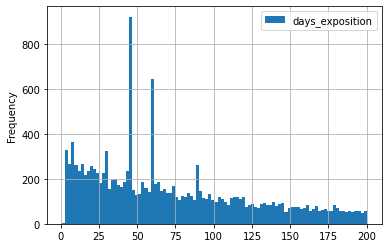

In [56]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

Среднее- 159 дней, медиана - 90 дней. Обычно продажа занимает от 3 до 100 дней. Быстрыми я бы назвал продажи в 1 квартиле до 43 дней, медленными - в 3 и 4 - свыше 90.

0.7586610830917613

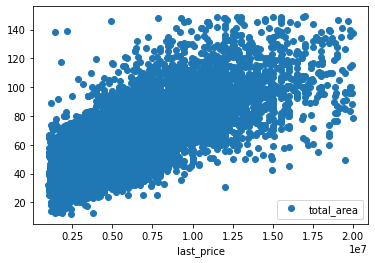

In [57]:
data.plot(x='last_price', y='total_area', style='o', sharex=False)
data['last_price'].corr(data['total_area'])

Довольно сильная корреляция

0.6389474852975023

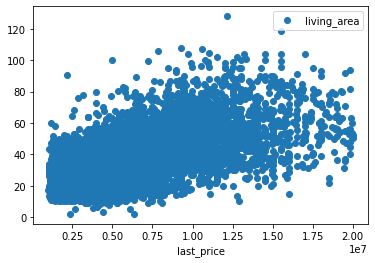

In [58]:
data.plot(x='last_price', y='living_area', style='o', sharex=False)
data['last_price'].corr(data['living_area'])

Корреляция слабее, но все еще сильна

0.5511477586644863

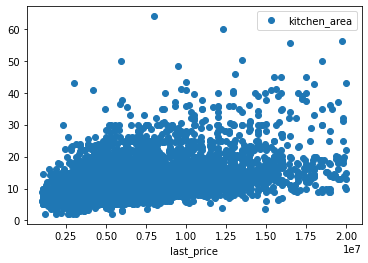

In [59]:
data.plot(x='last_price', y='kitchen_area', style='o', sharex=False)
data['last_price'].corr(data['kitchen_area'])

Корреляция еще слабее, есть редкие выбросы, но она все еще заметна

0.4836400563639191

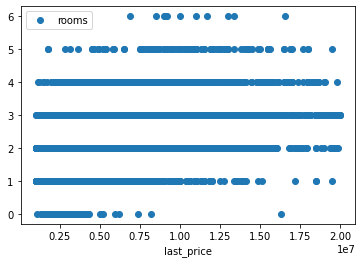

In [60]:
data.plot(x='last_price', y='rooms', style='o', sharex=False)
data['last_price'].corr(data['rooms'])

График дает мало информации, но коэффициент корреляции доволньо красноречив

,median
floor_category,
другой,4600000.0
первый,3814524.0
последний,4190000.0


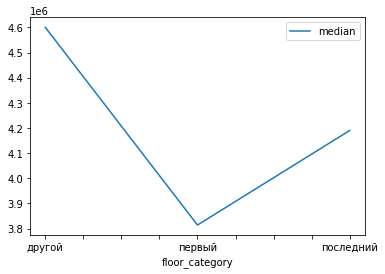

In [61]:
pivot_table_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = 'median')
pivot_table_floor_category.columns = ['median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category

Первый и последний этажи спросом не пользуются, особенно первый

,median
weekday_exposition,
1,4500000.0
2,4500000.0
3,4500000.0
5,4500000.0
0,4425000.0
4,4400000.0
6,4395000.0


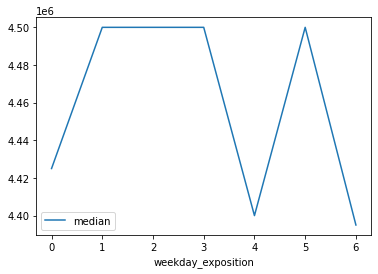

In [62]:
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = 'median')
pivot_table_weekday_exposition.columns = ['median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

В пятницу и воскресенье выкладываются наиболее дешевые вараинты - веселые люди продают дешевле

,median
month_exposition,
9,4569318.5
4,4500000.0
11,4500000.0
1,4490000.0
12,4490000.0
8,4482900.0
2,4450000.0
5,4450000.0
7,4450000.0


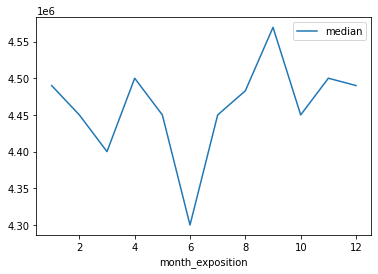

In [63]:
pivot_table_month_exposition = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = 'median')
pivot_table_month_exposition.columns = ['median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

Осенью самые дорогие квартиры - люди готовятся зимовать?

,median
year_exposition,
2014,6800000.0
2015,4890000.0
2019,4700000.0
2018,4450000.0
2016,4400000.0
2017,4400000.0


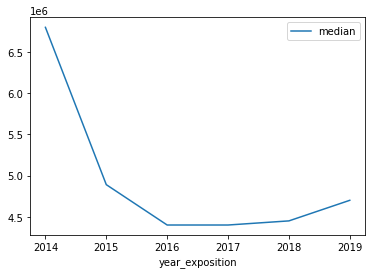

In [64]:
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = 'median')
pivot_table_year_exposition.columns = ['median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

Падение цен в 2015 - интересно почему

In [65]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
print (locality_pivot_table)
#самая высокая стоимость
print (locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()])
#самая низкая стоимость
print (locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()])

                 count           mean
locality_name                        
Санкт-Петербург  12721  107131.840893
Мурино             542   85894.547970
Кудрово            432   94471.979167
Шушары             404   77936.668317
Всеволожск         329   67032.452888
Колпино            304   74679.976974
Парголово          297   89631.084175
Пушкин             288  100739.513889
Гатчина            261   68381.421456
Выборг             203   57639.995074
                 count           mean
locality_name                        
Санкт-Петербург  12721  107131.840893
               count          mean
locality_name                     
Выборг           203  57639.995074


-0.3939067003376836

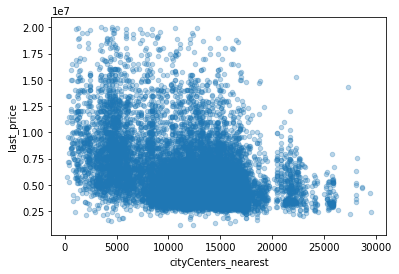

In [66]:
spb_flats = data.query('locality_name=="Санкт-Петербург"')
spb_flats.plot(kind = 'scatter', y = 'last_price', x = 'cityCenters_nearest', alpha = 0.3)

spb_flats['cityCenters_nearest'].corr(spb_flats['last_price'])

Чем ближе к центру Питера - тем дороже (но есть еще и пик в районе 22 километров - возможно там недешевый отдаленный район)

### Общий вывод

В процессе проекта полученные данные были очищены от аномалий, систематизированы, 
были добавлены новые столбцы для более удобного анализа, избавились от пропусков, от которых можно было избавиться,
изменили типы данных где это было возможно. Так же были сброшены неявные дубликаты, мешающие анализу, 
Были построеные гистограммы по всем столбцам для наглядности, установлены коэффициенты корреляции между различными характеристиками 
жилья и ее стоимости. Так жзе было установле, как быстро продавались квартиры. Так же мы узнали, что больше всегона цену жилья
влияет площадь квартиры (сюрприз, я тоже в шоке), а так же вяснили что в ленобласти самые дорогие квартиры в спб,
а самые дешевые в Выборге, кроме того в спб больше всего объявлений, а меньше всего - тоже в Выборге. Касательно СПб - очевимдно, что чем ближе к центру - тем дороже квартиры, но есть еще отдаленный от центра район с не низкими ценами.

Самые быстрые продажи происходят в течение 25 дней
Быстрыми продажи можно считать в срок 43
Долгие продажи - свыше 90 дней
Самые продаваемые квартиры - не первый и не последний этаж
Высота домов в СПб и ленобласти преимущественно 5 и 9 этажей
Самые продаваемые квартиры - однушки двушки и трешки. Они занимают большую часть рынка.

Осенью и зимой квартиры дорожают 
Санкт-Петербург является населенным пунктом с самой дорогой недвижимостью